# Problem Statement:
## Scrap affected, death, survived/ recover, active cases of corona virus division state wise in India. Collect data by web scraping from minimum 3 different website heading this section with which site data belongs and create some chart in python to represent collected data.

Website 1 :- https://prsindia.org/covid-19/cases

In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://prsindia.org/covid-19/cases"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Initialize a list to store the data rows
data = []

# Extract the table rows
rows = table.find_all('tr')
for row in rows[1:]:  # Exclude the first row (header row)
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
prsindia = pd.DataFrame(data, columns=headers,index=None)

# Dropping rows by index
prsindia = prsindia.drop([0])

# Resetting the index after dropping rows
prsindia = prsindia.reset_index(drop=True)


In [61]:
prsindia=prsindia.drop('#',axis=1)
prsindia

,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,Andaman and Nicobar Islands,10157,42,9986,129
1,Andhra Pradesh,2321379,755,2305893,14731
2,Arunachal Pradesh,64518,4,64218,296
3,Assam,724788,395,716405,7988
4,Bihar,832581,934,819388,12259
5,Chandigarh,93785,568,92052,1165
6,Chhattisgarh,1154179,861,1139282,14036
7,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
8,Delhi,1934009,4325,1903423,26261
9,Goa,248540,982,243720,3838


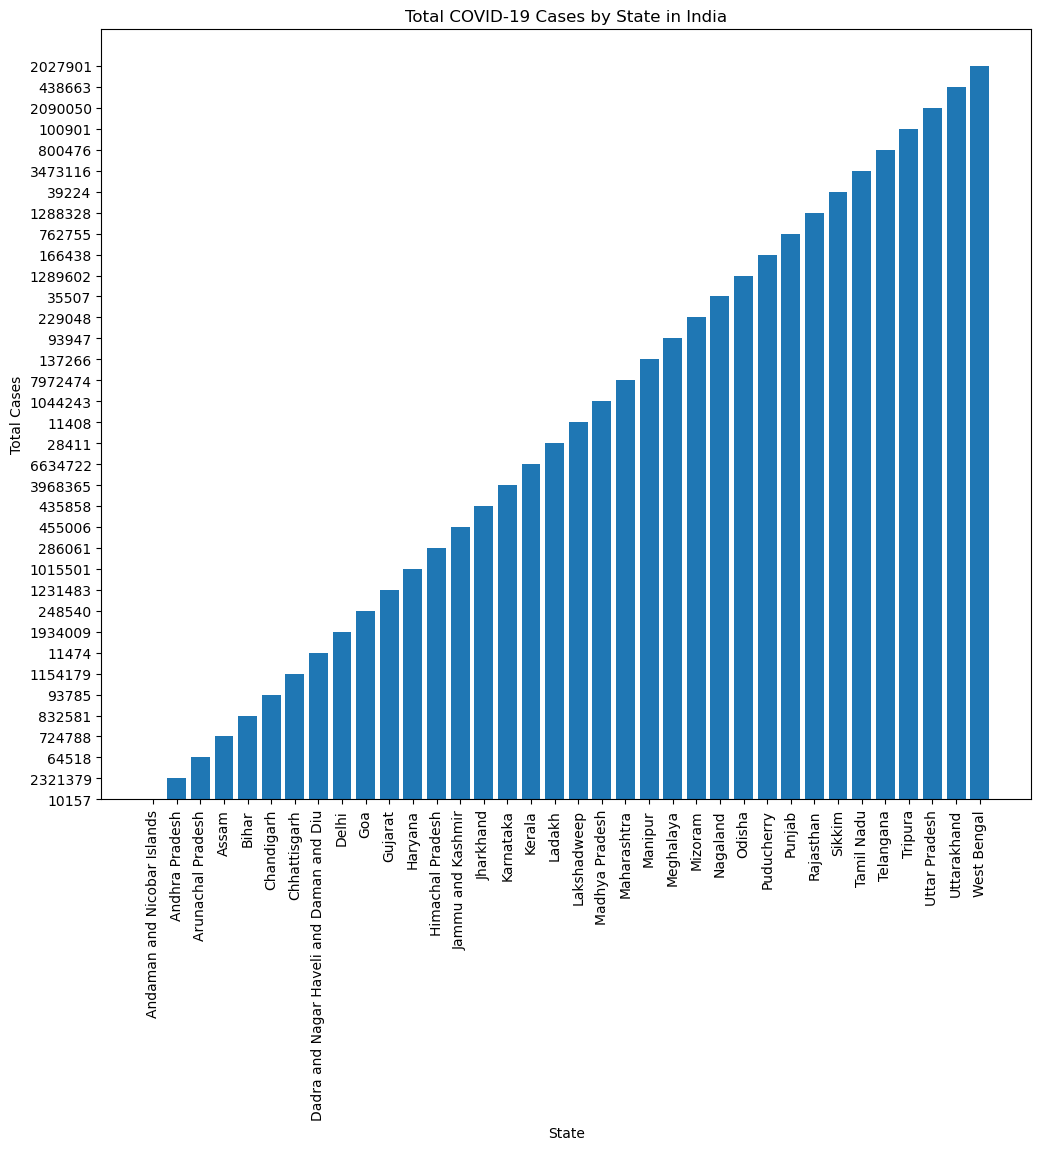

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.bar(prsindia["State/UT"], prsindia["Confirmed Cases"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.title("Total COVID-19 Cases by State in India")

plt.show()

Website 2 :- "https://bioinfo.usu.edu/covidTracker/india.php"

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url = "https://bioinfo.usu.edu/covidTracker/india.php"

# Send a GET request to the URL
response = requests.get(url,verify=False)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Initialize a list to store the data rows
data = []

# Extract the table rows
rows = table.find_all('tr')
for row in rows[1:]:  # Exclude the first row (header row)
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
bioinfo = pd.DataFrame(data, columns=headers,index=None)

# Print the DataFrame

bioinfo


,State,Total Cases,Total Recovered,Total Deaths,Active Cases
0,Andaman and Nicobar Islands,7440,7214,127,99
1,Andhra Pradesh,1867017,1804844,12490,49683
2,Arunachal Pradesh,33916,31189,160,2567
3,Assam,493688,458330,4344,29667
4,Bihar,720717,708586,9573,2557
5,Chandigarh,61542,60488,807,247
6,Chhattisgarh,992391,971662,13415,7314
7,Dadra and Nagar Haveli and Daman and Diu,10527,10435,4,55
8,Delhi,1433475,1406760,24948,1767
9,Goa,165426,159677,3022,2727


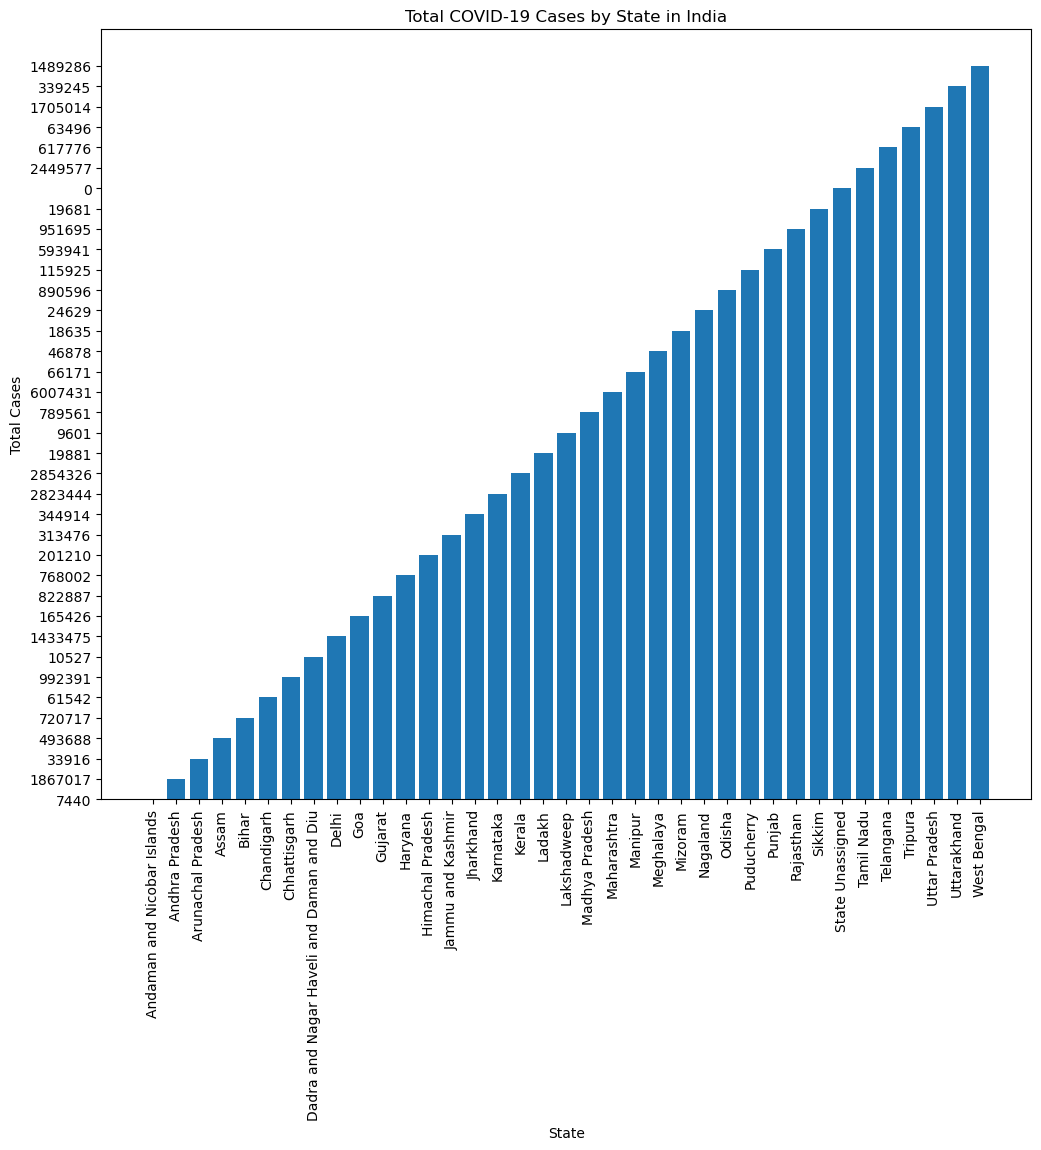

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.bar(bioinfo["State"], bioinfo["Total Cases"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.title("Total COVID-19 Cases by State in India")

plt.show()

Website 3:- "https://biospectrumindia.com/news/83/16116/coronavirus-covid-19-cases-in-india-state-wise-daily-updates-tracker.html"

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

url = "https://biospectrumindia.com/news/83/16116/coronavirus-covid-19-cases-in-india-state-wise-daily-updates-tracker.html"

# Send a GET request to the URL
response = requests.get(url,verify=False)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table element
table = soup.find('table')

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Initialize a list to store the data rows
data = []

# Extract the table rows
rows = table.find_all('tr')
for row in rows[1:]:  # Exclude the first row (header row)
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
biospectrumindia = pd.DataFrame(data, columns=headers,index=None)

# Print the DataFrame

biospectrumindia


,Name of State / UT,Active cases,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Total#,"137,448","141,029","8,102","286,579"
1,Andaman and Nicobar Islands,1,33,0,34
2,Andhra Pradesh,"2,292","2,899",78,"5,269"
3,Arunachal Pradesh,55,2,0,57
4,Assam,"1,839","1,249",4,"3,092"
5,Bihar,"2,606","3,071",33,"5,710"
6,Chandigarh,36,286,5,327
7,Chhattisgarh,854,402,6,"1,262"
8,Dadar Nagar Haveli,24,2,0,26
9,Daman & Diu,2,0,0,2


In [28]:
# Dropping rows by index
biospectrumindia = biospectrumindia.drop([0,37])

# Resetting the index after dropping rows
biospectrumindia = biospectrumindia.reset_index(drop=True)


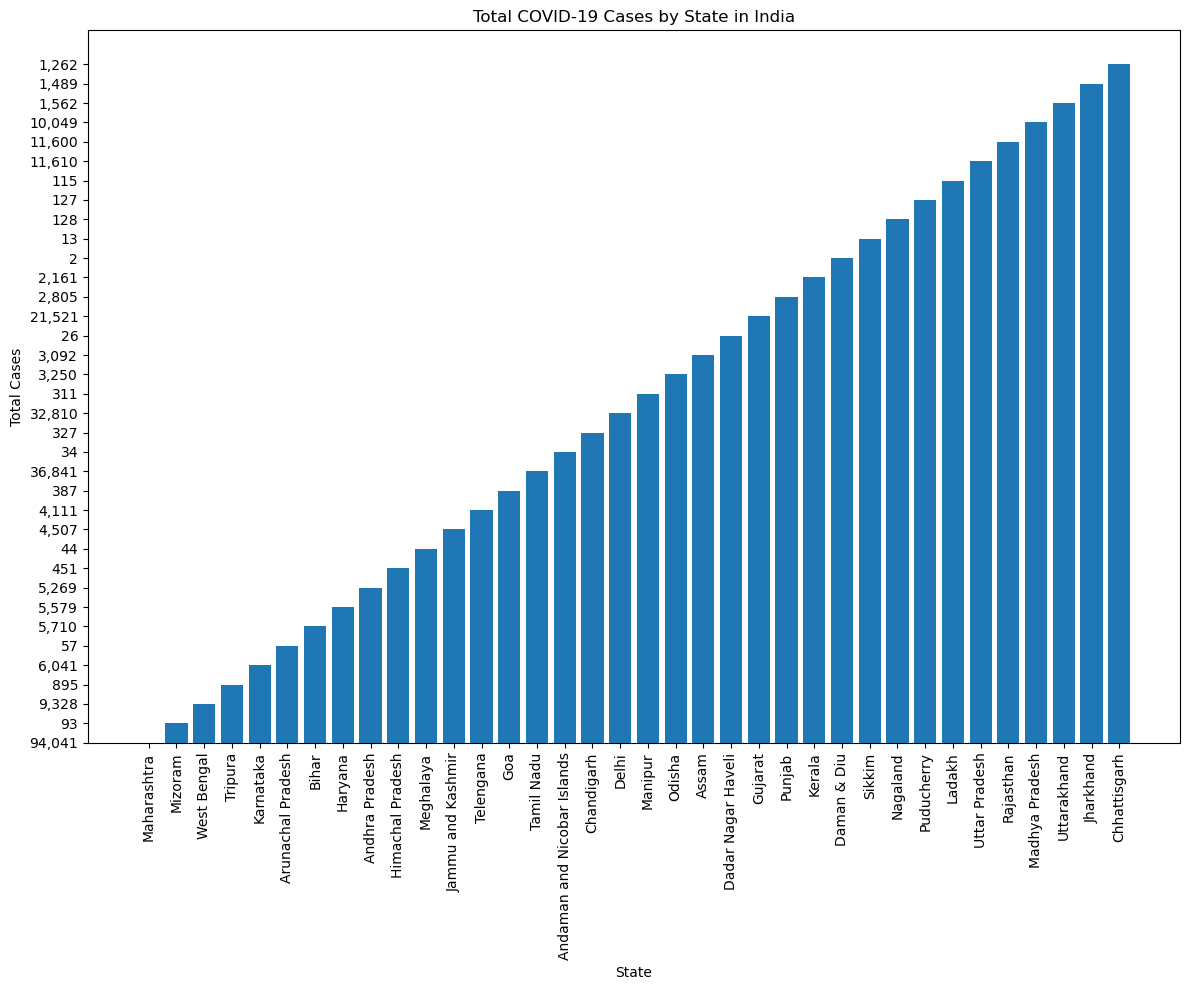

In [31]:
import matplotlib.pyplot as plt

biospectrumindia.sort_values("Total Confirmed cases*", ascending=False, inplace=True)
plt.figure(figsize=(12, 10))
plt.bar(biospectrumindia["Name of State / UT"], biospectrumindia["Total Confirmed cases*"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Cases")
plt.title("Total COVID-19 Cases by State in India")
plt.tight_layout()
plt.show()